# Get the Data

In [96]:
import pandas as pd
import numpy as np

In [97]:
import time

current_time = round(time.time())
print(current_time)

1607010994


min(df["date"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S').split()[0]))

In [98]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"symbol":"MSFT","from":511108200,"to":1606987541,"events":"div, split","interval":"1m","region":"US"}

headers = {
    'x-rapidapi-key': "eb056a72f9msh2564512806e6aebp12a874jsnd03d93885916",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
results=response.json()
print(response.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"MSFT","exchangeName":"NMS","instrumentType":"EQUITY","firstTradeDate":511108200,"regularMarketTime":1607010996,"gmtoffset":-18000,"timezone":"EST","exchangeTimezoneName":"America/New_York","regularMarketPrice":214.995,"chartPreviousClose":0.097,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EST","start":1606986000,"end":1607005800,"gmtoffset":-18000},"regular":{"timezone":"EST","start":1607005800,"end":1607029200,"gmtoffset":-18000},"post":{"timezone":"EST","start":1607029200,"end":1607043600,"gmtoffset":-18000}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[511108200,511194600,511453800,511540200,511626600,511713000,511799400,512058600,512145000,512231400,512317800,512663400,512749800,512836200,512922600,513009000,513268200,513354600,513441000,513527400,513613800,513873000,513959400,514045800,514132200,514218600,514477800,514564200,514650600,

In [99]:
len(results["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"])

8754

In [100]:
import pandas as pd
timestamp=[]
open=[]
high=[]
low=[]
close=[]
volume=[]
adjclose=[]

for i in range(len(results["chart"]["result"][0]["timestamp"])):
    timestamp.append(results["chart"]["result"][0]["timestamp"][i])
    open.append(results["chart"]["result"][0]["indicators"]["quote"][0]["open"][i])
    high.append(results["chart"]["result"][0]["indicators"]["quote"][0]["high"][i])
    low.append(results["chart"]["result"][0]["indicators"]["quote"][0]["low"][i])
    close.append(results["chart"]["result"][0]["indicators"]["quote"][0]["close"][i])
    volume.append(results["chart"]["result"][0]["indicators"]["quote"][0]["volume"][i])
    adjclose.append(results["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"][i])

df=pd.DataFrame({"timestamp":timestamp,"open":open,"high":high,"low":low,"close":close,"volume":volume,"adjclose":adjclose})
    

In [101]:
df.head()

,timestamp,open,high,low,close,volume,adjclose
0,511108200,0.08854166,0.10156250,0.08854166,0.09722222,1031788800,0.06189296
1,511194600,0.09722222,0.10243055,0.09722222,0.10069445,308160000,0.06410343
2,511453800,0.10069445,0.10329861,0.10069445,0.10243055,133171200,0.06520871
3,511540200,0.10243055,0.10329861,0.09895834,0.09982639,67766400,0.06355082
4,511626600,0.09982639,0.10069445,0.09722222,0.09809028,47894400,0.06244560


In [102]:
import datetime
df["timestamp"]=df["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d hh:mm:ss').split()[0])

df=df.set_index("timestamp")

In [103]:
df.head(8000)

,timestamp,open,high,low,close,volume,adjclose
0,1986-03-13,0.08854166,0.10156250,0.08854166,0.09722222,1031788800,0.06189296
1,1986-03-14,0.09722222,0.10243055,0.09722222,0.10069445,308160000,0.06410343
2,1986-03-17,0.10069445,0.10329861,0.10069445,0.10243055,133171200,0.06520871
3,1986-03-18,0.10243055,0.10329861,0.09895834,0.09982639,67766400,0.06355082
4,1986-03-19,0.09982639,0.10069445,0.09722222,0.09809028,47894400,0.06244560
...,...,...,...,...,...,...,...
7995,2017-11-28,84.06999969,85.05999756,84.01999664,84.87999725,21926000,81.35804749
7996,2017-11-29,84.70999908,84.91999817,83.18000031,83.33999634,27381100,79.88193512
7997,2017-11-30,83.51000214,84.51999664,83.33999634,84.16999817,33054600,80.67750549
7998,2017-12-01,83.59999847,84.80999756,83.22000122,84.26000214,29532100,80.76376343


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8754 entries, 0 to 8753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8754 non-null   object 
 1   open       8754 non-null   float64
 2   high       8754 non-null   float64
 3   low        8754 non-null   float64
 4   close      8754 non-null   float64
 5   volume     8754 non-null   int64  
 6   adjclose   8754 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 478.9+ KB


In [105]:
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8754 entries, 0 to 8753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8754 non-null   datetime64[ns]
 1   open       8754 non-null   float64       
 2   high       8754 non-null   float64       
 3   low        8754 non-null   float64       
 4   close      8754 non-null   float64       
 5   volume     8754 non-null   int64         
 6   adjclose   8754 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 478.9 KB


In [107]:
df.head()

,timestamp,open,high,low,close,volume,adjclose
0,1986-03-13,0.08854166,0.10156250,0.08854166,0.09722222,1031788800,0.06189296
1,1986-03-14,0.09722222,0.10243055,0.09722222,0.10069445,308160000,0.06410343
2,1986-03-17,0.10069445,0.10329861,0.10069445,0.10243055,133171200,0.06520871
3,1986-03-18,0.10243055,0.10329861,0.09895834,0.09982639,67766400,0.06355082
4,1986-03-19,0.09982639,0.10069445,0.09722222,0.09809028,47894400,0.06244560


In [108]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dtype: int64

In [109]:
df=df.dropna()

In [110]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dtype: int64

In [111]:
len(df)

8754

In [112]:
df=df.set_index("timestamp")

In [113]:
df.head()

,open,high,low,close,volume,adjclose
timestamp,,,,,,
1986-03-13,0.08854166,0.10156250,0.08854166,0.09722222,1031788800,0.06189296
1986-03-14,0.09722222,0.10243055,0.09722222,0.10069445,308160000,0.06410343
1986-03-17,0.10069445,0.10329861,0.10069445,0.10243055,133171200,0.06520871
1986-03-18,0.10243055,0.10329861,0.09895834,0.09982639,67766400,0.06355082
1986-03-19,0.09982639,0.10069445,0.09722222,0.09809028,47894400,0.06244560


In [114]:
df.loc['2014-08-07']

open             42.84000015
high             43.45000076
low              42.65000153
close            43.22999954
volume     30314900.00000000
adjclose         37.92569733
Name: 2014-08-07 00:00:00, dtype: float64

# Examine and prepare

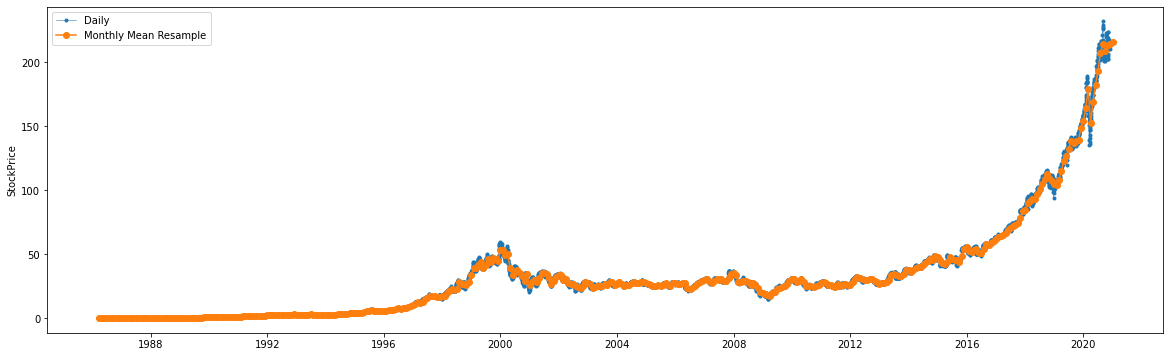

In [115]:
#Visualize de Data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

y=df["close"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('M').mean(),marker='o', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('StockPrice')
ax.legend();

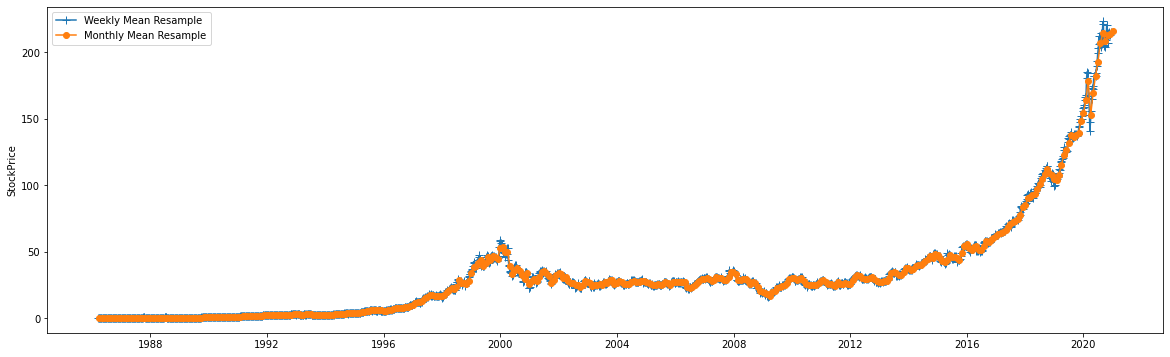

In [116]:
y=df["close"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y.resample('W').mean(),marker='+', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(y.resample('M').mean(),marker='o', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('StockPrice')
ax.legend();

In [117]:
# Decompose the Data
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [118]:
y_W=y.resample('W').mean()

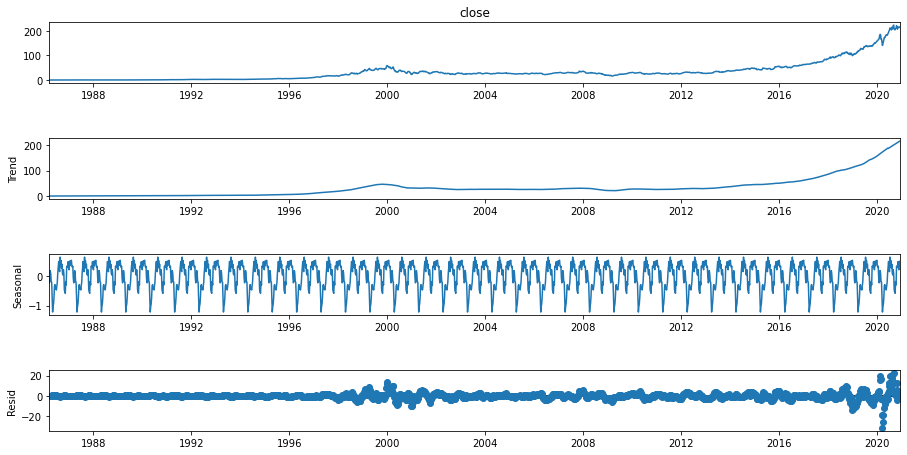

In [119]:
seasonal_decompose(y_W)

In [120]:
#Test for stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

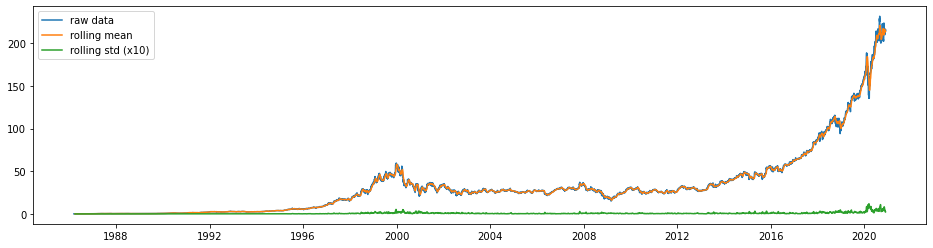

In [121]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [122]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [123]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 6.462
P-value = 1.000
Critical values :
	1%: -3.4311004849620277 - The data is not stationary with 99% confidence
	5%: -2.861871664330008 - The data is not stationary with 95% confidence
	10%: -2.5669465399587956 - The data is not stationary with 90% confidence


In [124]:
#Make the data stationary
#detrending
y_detrend =  (y- y.rolling(window=12).mean())/y.rolling(window=12).std()

 > Is the de-trended data stationary ?
Test statistic = -27.566
P-value = 0.000
Critical values :
	1%: -3.431098680587732 - The data is  stationary with 99% confidence
	5%: -2.861870867017309 - The data is  stationary with 95% confidence
	10%: -2.5669461155438067 - The data is  stationary with 90% confidence


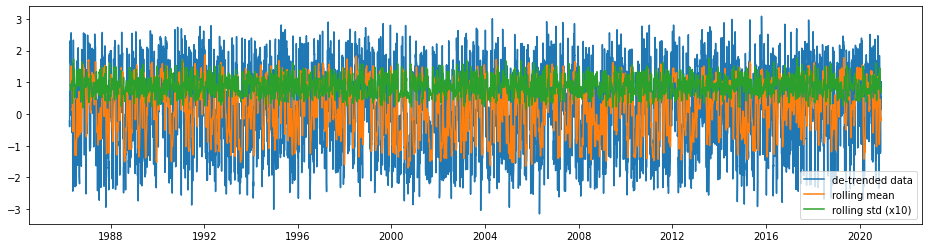

In [125]:
test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

In [126]:
y_detrend.dropna()

timestamp
1986-03-31   -0.22003169
1986-04-01   -0.39823788
1986-04-02   -0.04347399
1986-04-03    0.47727014
1986-04-04    0.70255889
                 ...    
2020-11-25    0.11469241
2020-11-27    0.53027125
2020-11-30    0.15025926
2020-12-01    1.02054312
2020-12-02    0.73724721
Name: close, Length: 8743, dtype: float64

 > Is the 12 lag differenced data stationary ?
Test statistic = -12.690
P-value = 0.000
Critical values :
	1%: -3.4311015199433696 - The data is  stationary with 99% confidence
	5%: -2.8618721216649274 - The data is  stationary with 95% confidence
	10%: -2.5669467834013306 - The data is  stationary with 90% confidence


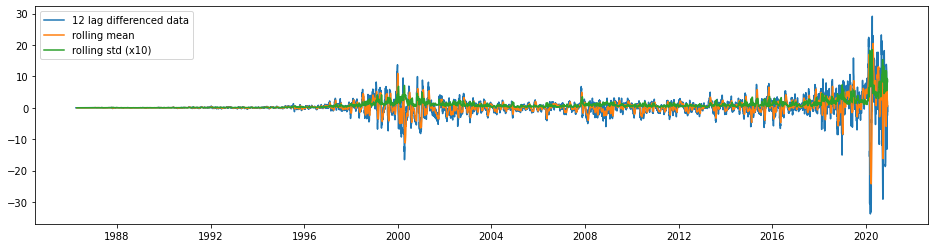

In [127]:
#Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

In [128]:
y_12lag.dropna()

timestamp
1986-04-01   -0.00260417
1986-04-02   -0.00520834
1986-04-03   -0.00607639
1986-04-04   -0.00347222
1986-04-07   -0.00347222
                 ...    
2020-11-25   -4.52000427
2020-11-27    4.22000122
2020-11-30   -2.47999573
2020-12-01    0.77000427
2020-12-02   -1.13999939
Name: close, Length: 8742, dtype: float64

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -20.870
P-value = 0.000
Critical values :
	1%: -3.4311023846109663 - The data is  stationary with 99% confidence
	5%: -2.861872503741921 - The data is  stationary with 95% confidence
	10%: -2.5669469867835737 - The data is  stationary with 90% confidence


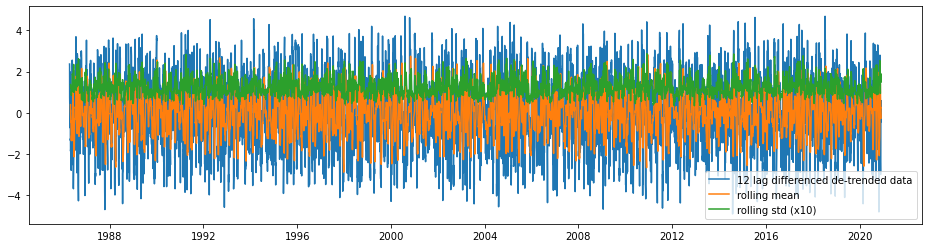

In [129]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

In [130]:
y_12lag_detrend.dropna()

timestamp
1986-04-16    2.36422779
1986-04-17    2.24918302
1986-04-18    0.75084644
1986-04-21    0.11222435
1986-04-22   -0.72551835
                 ...    
2020-11-25   -0.72716697
2020-11-27    0.55826813
2020-11-30   -0.44787762
2020-12-01    0.58745315
2020-12-02    0.28810183
Name: close, Length: 8731, dtype: float64

#Create training and test datasets
y=y_12lag_detrend.dropna()

In [131]:
y_12lag_detrend.dropna()

timestamp
1986-04-16    2.36422779
1986-04-17    2.24918302
1986-04-18    0.75084644
1986-04-21    0.11222435
1986-04-22   -0.72551835
                 ...    
2020-11-25   -0.72716697
2020-11-27    0.55826813
2020-11-30   -0.44787762
2020-12-01    0.58745315
2020-12-02    0.28810183
Name: close, Length: 8731, dtype: float64

y=pd.DataFrame(y)

In [132]:
dates_to_predict=[]
start = datetime.datetime.strptime("1986-03-13", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-03", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_to_predict.append(date.strftime("%Y-%m-%d"))

In [133]:
y

timestamp
1986-03-13     0.09722222
1986-03-14     0.10069445
1986-03-17     0.10243055
1986-03-18     0.09982639
1986-03-19     0.09809028
                 ...     
2020-11-25   213.86999512
2020-11-27   215.22999573
2020-11-30   214.07000732
2020-12-01   216.21000671
2020-12-02   215.36999512
Name: close, Length: 8754, dtype: float64

In [134]:
y.loc['1986-04-16']

0.1041666641831398

In [135]:
y_to_train = y[:'2019-12-03']
y_to_val = y['2019-12-03':] # last X months for test  
predict_date = len(y) - len(y[:'2019-12-03'])# dataset to train

In [136]:
y=pd.DataFrame(y)

In [137]:
y_to_train

timestamp
1986-03-13     0.09722222
1986-03-14     0.10069445
1986-03-17     0.10243055
1986-03-18     0.09982639
1986-03-19     0.09809028
                 ...     
2019-11-26   152.02999878
2019-11-27   152.32000732
2019-11-29   151.38000488
2019-12-02   149.55000305
2019-12-03   149.30999756
Name: close, Length: 8502, dtype: float64

In [138]:
y_to_val

timestamp
2019-12-03   149.30999756
2019-12-04   149.85000610
2019-12-05   149.92999268
2019-12-06   151.75000000
2019-12-09   151.36000061
                 ...     
2020-11-25   213.86999512
2020-11-27   215.22999573
2020-11-30   214.07000732
2020-12-01   216.21000671
2020-12-02   215.36999512
Name: close, Length: 253, dtype: float64

In [88]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [ ]:
sarima_grid_search(y,12)

In [139]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2995      0.009    -34.466      0.000      -0.317      -0.282
ma.L1          0.0734      0.009      7.880      0.000       0.055       0.092
ar.S.L12      -0.5785      0.038    -15.279      0.000      -0.653      -0.504
ma.S.L12       0.6249      0.037     16.920      0.000       0.553       0.697
sigma2         1.0074      0.003    344.316      0.000       1.002       1.013


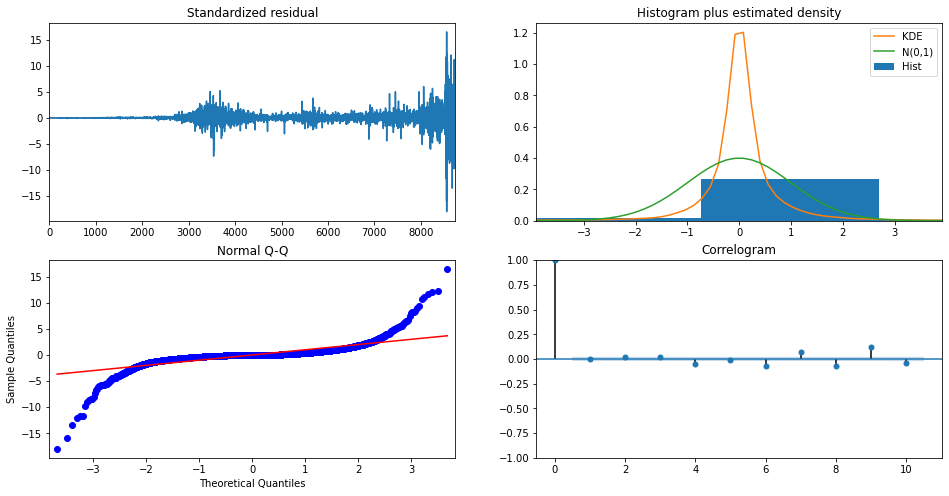

In [140]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [141]:
import sklearn
from sklearn.metrics import r2_score
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results=mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted)
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted_dynamic)
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')

    plt.legend()
    plt.show()
    
    return (results)

import sklearn
from sklearn.metrics import r2_score
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results=mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted)
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')
    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2995      0.009    -34.466      0.000      -0.317      -0.282
ma.L1          0.0734      0.009      7.880      0.000       0.055       0.092
ar.S.L12      -0.5785      0.038    -15.279      0.000      -0.653      -0.504
ma.S.L12       0.6249      0.037     16.920      0.000       0.553       0.697
sigma2         1.0074      0.003    344.316      0.000       1.002       1.013


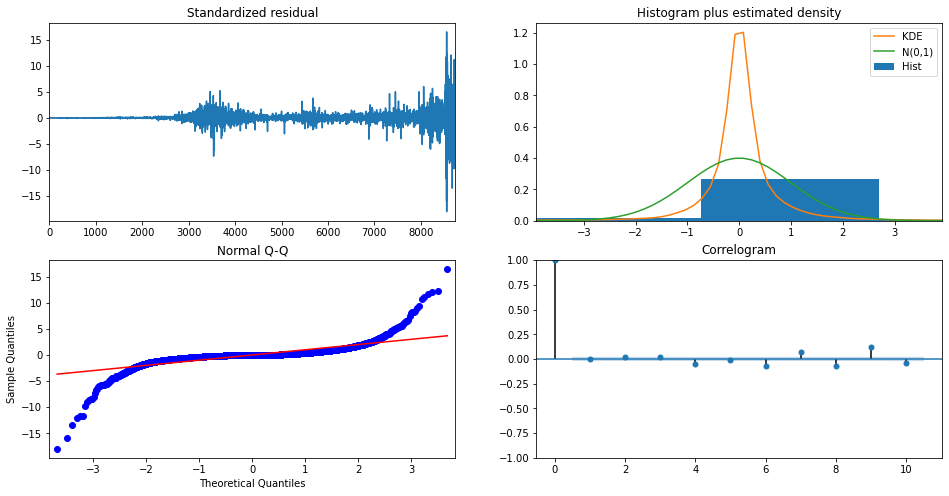

The Root Mean Squared Error of SARIMA with season_length=365 and dynamic = False 4.48
The R2 of the model is:  0.9647216436639127


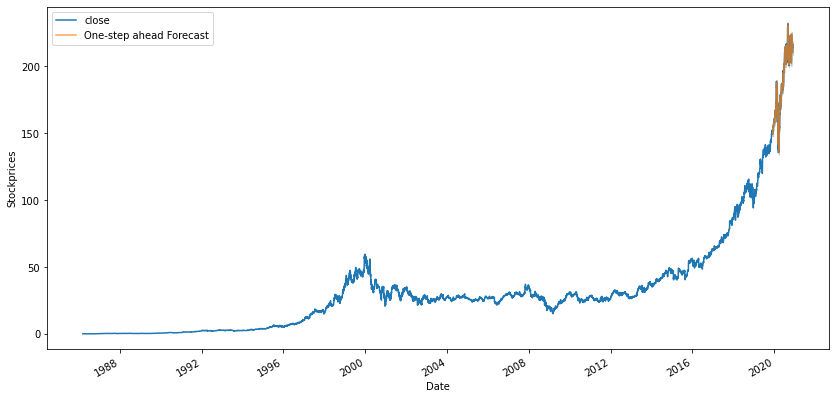

The Root Mean Squared Error of SARIMA with season_length=365 and dynamic = True 44.93
The R2 of the model is:  -2.552571803723276


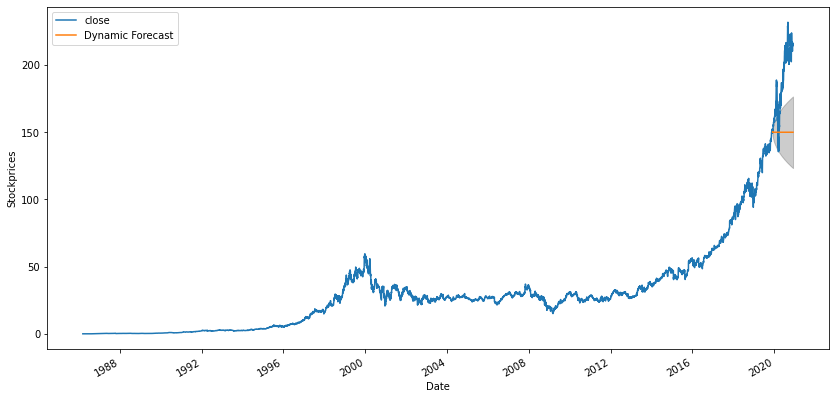

In [142]:
model=sarima_eva(y,(1, 1, 1),(1, 0, 1, 12),365,'2019-12-03',y_to_val)

# Forecasting

Some of the values are missing and therefore removed from the index, thus, there is no clear frequency in the index. We will need to reset the index so that we are able to do the forecasting.

In [143]:
y=y.reset_index()

In [144]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps,dynamic=False)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int(dynamic=False)
    #print(pred_ci)
    ax = y.close.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel("close")

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    display(pci)
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

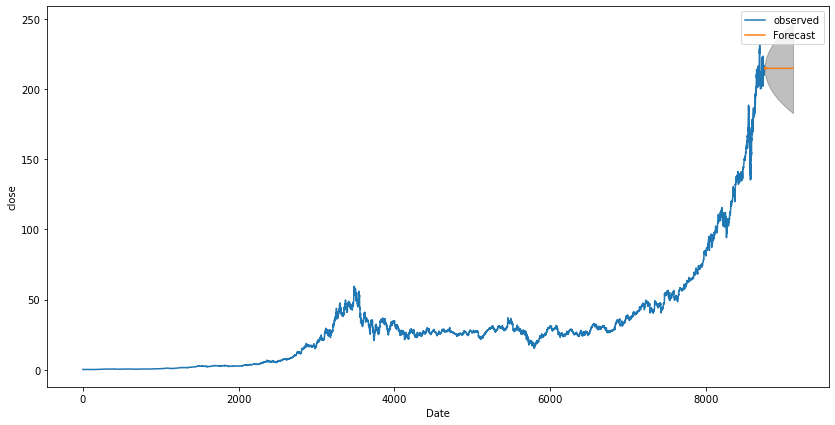

,Date,Lower Bound,Upper Bound
0,8754,213.70078975,217.63511375
1,8755,212.94326767,217.91806986
2,8756,212.28691786,218.26288457
3,8757,211.76888370,218.56251733
4,8758,210.89142580,218.42467407
...,...,...,...
360,9114,183.22048110,246.77301987
361,9115,183.17649309,246.81700786
362,9116,183.13256581,246.86093512
363,9117,183.08869900,246.90480191


,Date,Predicted_Mean,Lower Bound,Upper Bound
0,8754,215.66795175,213.70078975,217.63511375
1,8755,215.43066877,212.94326767,217.91806986
2,8756,215.27490121,212.28691786,218.26288457
3,8757,215.16570051,211.76888370,218.56251733
4,8758,214.65804994,210.89142580,218.42467407


In [145]:
final_table = forecast(model,365,y)
final_table.head()

The final table comprises the predicted values, as well as the lower and upper bound which reflect the confidence interval in which are predictions are.

In [ ]:
final_table.head()

In [ ]:
import datetime

dates_to_predict=[]
start = datetime.datetime.strptime("2020-12-03", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-03", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_to_predict.append(date.strftime("%Y-%m-%d"))

In [ ]:
final_table["Date"]=dates_to_predict

In [ ]:
final_table.head()

In [ ]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    final_table.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

In [ ]:
len(df)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()